In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [3]:
df_test = pd.read_csv('./data/test.csv')
df_test

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15
...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64


In [4]:
df_sample = pd.read_csv('./data/sample_submission.csv')
df_sample

,id,MLM,HLM
0,TEST_000,0,0
1,TEST_001,0,0
2,TEST_002,0,0
3,TEST_003,0,0
4,TEST_004,0,0
...,...,...,...
478,TEST_478,0,0
479,TEST_479,0,0
480,TEST_480,0,0
481,TEST_481,0,0


In [5]:
# column 순서 조절 및 'id' drop
new_column_order = ['id', 'MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

df_train = df_train[new_column_order]
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)
df_train.head()

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5,2,8,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2,1,2,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5,0,3,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6,0,5,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3,0,1,2.337,42.43


In [6]:
df_test.head()

,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15


In [7]:
# ! pip install sweetviz

In [8]:
# import sweetviz as sw

# analyze_report = sw.analyze(df_train)
# analyze_report.show_html('train_output.html', open_browser= True)

In [9]:
# comparison_report = sw.compare(df_train, df_test)
# comparison_report.show_html('train_test_compare_output.html', open_browser= True)

In [10]:
# ! pip install rdkit

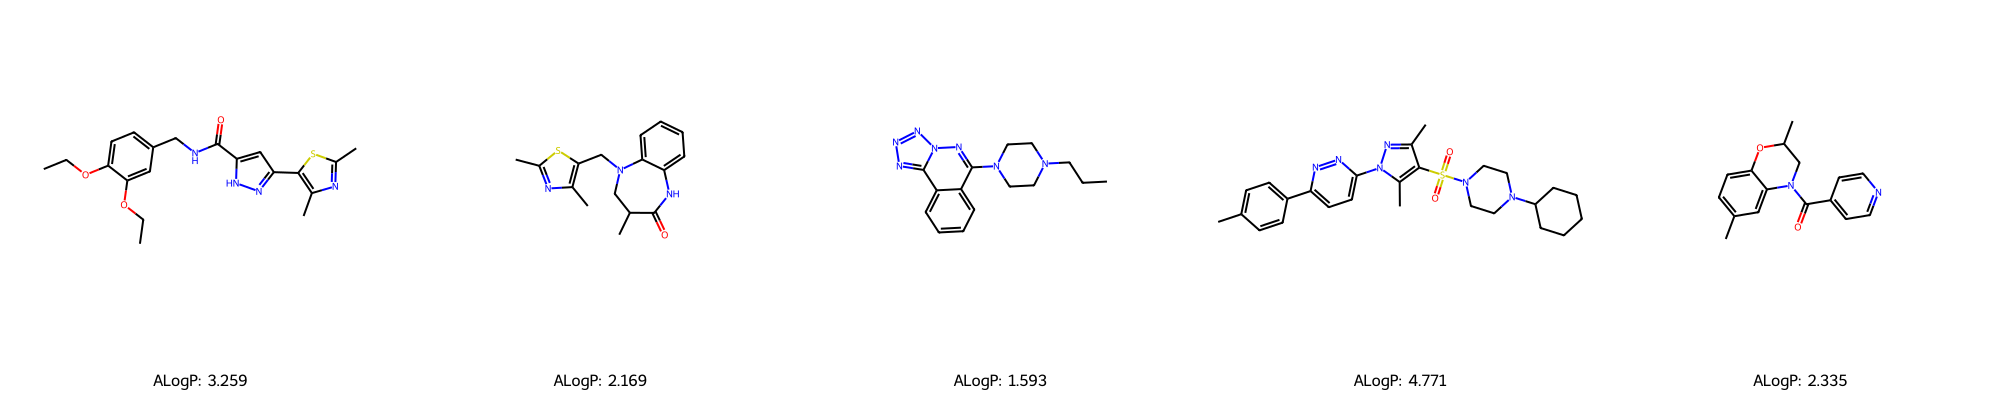

In [11]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

def show_smiles(smiles):
  data_smiles = smiles['SMILES']
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in data_smiles]

  # Draw the first molecules
  img = Draw.MolsToGridImage(molecules[:5], molsPerRow=5, subImgSize=(400,400),
                             legends=[f'ALogP: {round(x, 3)}' for x in smiles['AlogP']], 
                             returnPNG=False)
                             
  from IPython.display import display, Image
  display(img)

show_smiles(df_train)

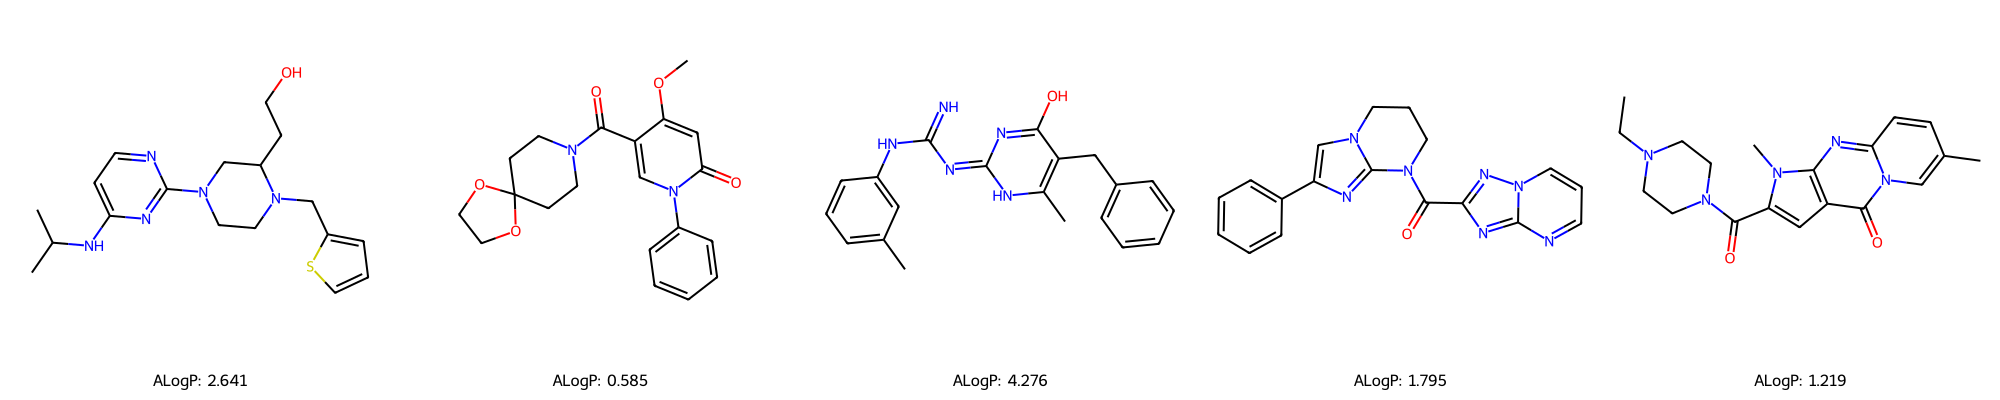

In [12]:
show_smiles(df_test)

In [13]:
def resumetable(df):
    print(f'dataset size: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['num of missing value'] = df.isnull().sum().values
    summary['num of unique value'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    
    return summary

resumetable(df_train)

dataset size: (3498, 10)


,feature,data type,num of missing value,num of unique value,First value,Second value,Third value
0,MLM,float64,0,2735,26.01,29.27,5.586
1,HLM,float64,0,2781,50.68,50.59,80.892
2,SMILES,object,0,3471,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3,AlogP,float64,2,2561,3.259,2.169,1.593
4,Molecular_Weight,float64,0,3052,400.495,301.407,297.358
5,Num_H_Acceptors,int64,0,15,5,2,5
6,Num_H_Donors,int64,0,10,2,1,0
7,Num_RotatableBonds,int64,0,20,8,2,3
8,LogD,float64,0,2635,3.259,2.172,1.585
9,Molecular_PolarSurfaceArea,float64,0,2164,117.37,73.47,62.45


In [14]:
resumetable(df_test)

dataset size: (483, 8)


,feature,data type,num of missing value,num of unique value,First value,Second value,Third value
0,SMILES,object,0,483,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1
1,AlogP,float64,1,465,2.641,0.585,4.276
2,Molecular_Weight,float64,0,469,361.505,370.399,347.414
3,Num_H_Acceptors,int64,0,12,4,5,4
4,Num_H_Donors,int64,0,6,2,0,4
5,Num_RotatableBonds,int64,0,14,7,3,5
6,LogD,float64,0,466,2.635,0.585,4.29
7,Molecular_PolarSurfaceArea,float64,0,430,92.76,68.31,92.86


In [15]:
# SMILES : 분자 구조
# MLM : mouse liver microsome 쥐의 간을 이용한 약물 대사 반응치
# HLM : human liver microsome 사람 간을 이용한 약물 대사 반응치
# AlogP : 유기 화합물의 수분해성 (낮을수록 수분해성이 높음)
# LogD : 
# Molecular_Weight
# Num_H_Acceptors
# Num_H_Donors
# Num_RotatableBonds
# Molecular_PolarSurfaceArea

## AlogP는 MCAR, MAR, NMAR 어떤 종류의 결측값인가?
MCAR: If the missing values do not have any relation to the column it belongs to and with the rest of the columns in the dataset then it is called Missing Completely at Random.   
MAR: If the missing values do not have any relation to the column it belongs to but have a relation with any other columns in the dataset it is called Missing At Random   
MNAR: If the missing values do have a relation to the column it belongs to but do not have a relation with any other columns in the dataset it is called Missing Not at Random.

In [16]:
# AlogP는 MAR에 가깝다고 추정 / Molecular_Weight, Num_H_Acceptors 등 다른 열 정보로 추정이 가능하지 않을까.
# LogD와 상관관계가 상당히 높음

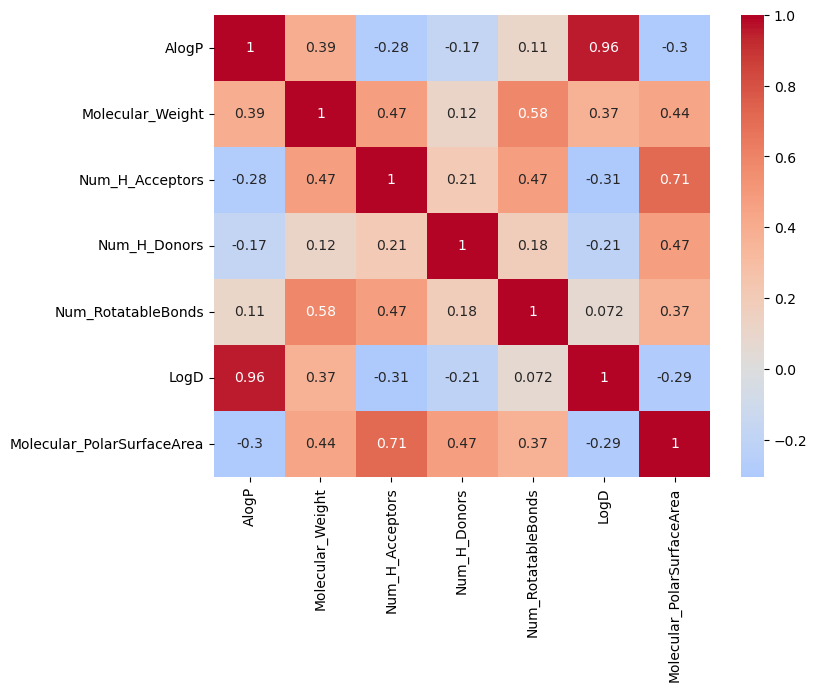

In [17]:
df_corr = df_train.iloc[:, 3:]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0);

In [18]:
df_train[df_train.AlogP.isna()]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2796,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,NaN,418.566,5,1,7,4.634,72.83
3387,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,NaN,390.450,3,0,5,4.911,34.06


train 데이터 27 쌍이 같은 인풋값을 가지나 MLM, HLM이 불일치

In [19]:
pd.set_option('display.max_rows', 10)

duplicated_rows = df_train[df_train.iloc[:, 2:].duplicated(keep=False)]
sorted_duplicates = duplicated_rows.sort_values(by='SMILES', ascending=False)

sorted_duplicates

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2134,1.416,1.404,O=S(=O)(c1ccccc1)n1ccc(C/C=C/Cc2ccn(S(=O)(=O)c...,5.630,466.572,4,0,8,5.630,94.90
3265,10.930,20.330,O=S(=O)(c1ccccc1)n1ccc(C/C=C/Cc2ccn(S(=O)(=O)c...,5.630,466.572,4,0,8,5.630,94.90
2332,0.007,0.038,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6,1,2,-0.533,111.44
2159,113.210,99.000,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6,1,2,-0.533,111.44
216,40.530,87.780,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7,0,4,-1.133,108.65
...,...,...,...,...,...,...,...,...,...,...
366,73.740,66.850,CC(=O)Nc1nc2ccc(-c3nn(C(C)C)c4nc(N)ncc34)cc2s1,2.293,367.428,5,2,3,2.307,139.85
543,68.485,85.872,CC(=O)Nc1ccc(N2N=C(c3ccc(O)cc3)C(C)CC2=O)cc1,2.172,337.372,4,2,3,2.169,82.00
2891,55.950,69.950,CC(=O)Nc1ccc(N2N=C(c3ccc(O)cc3)C(C)CC2=O)cc1,2.172,337.372,4,2,3,2.169,82.00
451,0.310,24.670,C(=C/c1nnn(Cc2ccccc2)n1)\c1ccccc1,3.556,262.309,3,0,4,3.556,43.60


In [20]:
# 기존 출력 옵션으로 변경
pd.set_option('display.max_rows', 10)

average_df = sorted_duplicates.groupby('SMILES').mean().reset_index()

# column 순서 조절
new_column_order = ['MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

average_df = average_df[new_column_order]
average_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,0.9225,28.0615,C(=C/c1nnn(Cc2ccccc2)n1)\c1ccccc1,3.556,262.309,3.0,0.0,4.0,3.556,43.60
1,62.2175,77.9110,CC(=O)Nc1ccc(N2N=C(c3ccc(O)cc3)C(C)CC2=O)cc1,2.172,337.372,4.0,2.0,3.0,2.169,82.00
2,68.6310,64.6690,CC(=O)Nc1nc2ccc(-c3nn(C(C)C)c4nc(N)ncc34)cc2s1,2.293,367.428,5.0,2.0,3.0,2.307,139.85
3,32.1435,85.6850,CC(C)(C)OC(=O)N1CCC(c2n[nH]c3nc(S(C)(=O)=O)ncc...,1.684,381.450,7.0,1.0,4.0,1.684,126.52
4,3.6870,43.3385,CC(C)COc1cc(=O)n2c(c1C(=O)N1CCC(C)CC1)CCCCC2,2.843,360.490,3.0,0.0,4.0,2.843,49.85
...,...,...,...,...,...,...,...,...,...,...
22,56.0435,66.1260,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98
23,56.3130,63.7320,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53
24,70.2150,93.8400,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65
25,56.6085,49.5190,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44


In [21]:
# 테스트 데이터는 문제 없음
duplicated_rows_test = df_test[df_test.duplicated(keep=False)]
sorted_duplicates_test = duplicated_rows_test.sort_values(by='SMILES', ascending=False)

sorted_duplicates_test

,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea


In [22]:
# 중복값 제거
unique_df = df_train[~df_train.iloc[:, 2:].duplicated(keep=False)]
unique_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5,2,8,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2,1,2,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5,0,3,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6,0,5,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...
3493,1.556,3.079,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,3.409,396.195,3,1,5,3.409,64.74
3494,35.560,47.630,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,1.912,359.381,4,1,3,1.844,77.37
3495,56.150,1.790,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,1.941,261.320,3,1,6,2.124,70.14
3496,0.030,2.770,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.989,284.696,5,1,5,0.989,91.51


In [23]:
merged_df = pd.concat([unique_df, average_df])
merged_df.reset_index(drop = True, inplace = True)
merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44


In [24]:
merged_df[merged_df.AlogP.isna()]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2752,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,NaN,418.566,5.0,1.0,7.0,4.634,72.83
3334,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,NaN,390.450,3.0,0.0,5.0,4.911,34.06


In [25]:
# 결측치 대체
merged_df['AlogP'].fillna(merged_df['LogD'], inplace=True)
row_2752 = merged_df.loc[[2752]]
row_3334 = merged_df.loc[[3334]]

missing_df = pd.concat([row_2752, row_3334])
missing_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2752,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,4.634,418.566,5.0,1.0,7.0,4.634,72.83
3334,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,4.911,390.450,3.0,0.0,5.0,4.911,34.06


train 같은 인풋값 대비 여러 아웃풋 MLM, HLM average로 변환, 결측치 AlogP LogD로 채움.

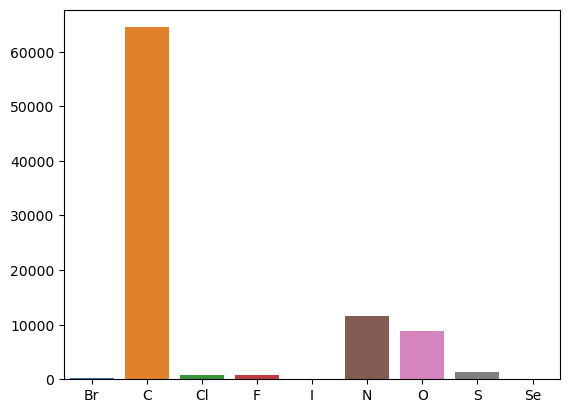

In [26]:
# 원자 빈도수 특성 추가 고려
def atom_frequency(smiles_list):
    atom_counts = []
    for smiles in smiles_list:
        # Convert the SMILES string to an RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)
        # Get the atoms in the molecule
        atoms = mol.GetAtoms()
        # Add the symbol for each atom to the atom_counts list
        atom_counts.extend([atom.GetSymbol() for atom in atoms])

    # Create a pandas series with the counts of each atom type
    plot_data = pd.Series(atom_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values)

atom_frequency(merged_df['SMILES'])

In [27]:
from collections import Counter

def count_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
        atom_counts = dict(Counter(atom_symbols))
        return atom_counts
    else:
        return {}

merged_df['Atom_Counts'] = merged_df['SMILES'].apply(count_atoms)
merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,Atom_Counts
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,"{'C': 20, 'O': 3, 'N': 4, 'S': 1}"
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,"{'C': 16, 'N': 3, 'O': 1, 'S': 1}"
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,"{'C': 15, 'N': 7}"
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,"{'C': 26, 'N': 6, 'S': 1, 'O': 2}"
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,"{'C': 16, 'N': 2, 'O': 2}"
...,...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98,"{'C': 29, 'N': 4, 'O': 3, 'Cl': 2}"
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53,"{'C': 24, 'N': 5, 'O': 3, 'S': 1}"
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,"{'N': 5, 'C': 19, 'O': 4}"
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,"{'N': 6, 'C': 13, 'O': 3}"


In [28]:
atom_counts_df = pd.DataFrame(merged_df['Atom_Counts'].tolist()).fillna(0).astype(int)
merged_df = pd.concat([merged_df, atom_counts_df], axis=1)
merged_df = merged_df.drop(columns=['Atom_Counts'])

merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,C,O,N,S,F,Cl,Br,Se,I
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,20,3,4,1,0,0,0,0,0
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,16,1,3,1,0,0,0,0,0
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,15,0,7,0,0,0,0,0,0
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,26,2,6,1,0,0,0,0,0
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,16,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98,29,3,4,0,0,2,0,0,0
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53,24,3,5,1,0,0,0,0,0
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,19,4,5,0,0,0,0,0,0
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,13,3,6,0,0,0,0,0,0


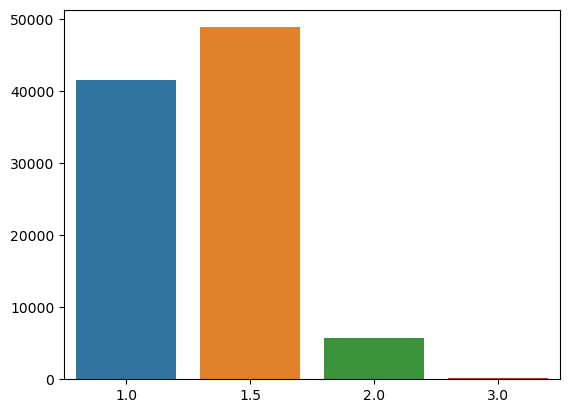

In [29]:
# 결합 빈도수 특성 추가 고려
def bond_frequency_plot(smiles_list):
    """
    Frequency of different bond types
    :param smiles_list: A list of SMILES strings
    """
    bond_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        bonds = mol.GetBonds()
        # Loop through each bond in the molecule and append its bond type to the bond_counts list
        bond_counts.extend([bond.GetBondTypeAsDouble() for bond in bonds])
    # Count the frequency of each bond type and sort the counts in ascending order
    plot_data = pd.Series(bond_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values)

bond_frequency_plot(merged_df['SMILES'])

In [30]:
def bond_frequency(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        bonds = mol.GetBonds()
        bond_counts = [bond.GetBondTypeAsDouble() for bond in bonds]
        bond_freq = dict(Counter(bond_counts))
        return bond_freq
    else:
        return {}

# dictionary 형태로 저장 및 pandas column 변환
merged_df['Bond_Frequencies'] = merged_df['SMILES'].apply(bond_frequency)
bond_freq_df = pd.DataFrame(merged_df['Bond_Frequencies'].tolist()).fillna(0).astype(int)
merged_df = pd.concat([merged_df, bond_freq_df], axis=1)

# 추출한 특성 drop
merged_df = merged_df.drop(columns=['Bond_Frequencies'])

# 결합 column name 변경
new_column_names = {
    1.0: 'Bond10',
    1.5: 'Bond15',
    2.0: 'Bond20',
    3.0: 'Bond30'
}
merged_df = merged_df.rename(columns=new_column_names)

merged_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,S,F,Cl,Br,Se,I,Bond10,Bond15,Bond20,Bond30
0,26.0100,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,...,1,0,0,0,0,0,13,16,1,0
1,29.2700,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,...,1,0,0,0,0,0,11,11,1,0
2,5.5860,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,...,0,0,0,0,0,0,10,15,0,0
3,5.7100,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,...,1,0,0,0,0,0,20,17,2,0
4,93.2700,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,...,0,0,0,0,0,0,9,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,56.0435,66.126,Cc1ccc(-c2ccc(C(CN3CCCC3)N(C)C(=O)CN3C(=O)COc4...,4.282,553.480,5.0,0.0,7.0,4.009,65.98,...,0,0,2,0,0,0,22,18,2,0
3467,56.3130,63.732,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6.0,1.0,4.0,4.304,113.53,...,1,0,0,0,0,0,7,27,3,0
3468,70.2150,93.840,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,...,0,0,0,0,0,0,22,6,2,1
3469,56.6085,49.519,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,...,0,0,0,0,0,0,15,6,2,1


전체 letter의 개수를 세는게 의미가 있을지는 의문이지만 나중에 시도

In [31]:
df_total = pd.concat([merged_df, df_test])
trainData = df_total['SMILES']
trainData

0        CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC
1                   Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1
2                       CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3      Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...
4                    Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2
                             ...                        
478                    CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1
479       CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1
480        CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12
481                Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1
482                         CC(C)C(CCN1CCN(C)CC1)c1ccco1
Name: SMILES, Length: 3954, dtype: object

In [32]:
frequency = {}

for a in trainData:
    for letter in a:
        if letter in frequency.keys():
            frequency[letter]+=1
        else:
            frequency[letter]=1

In [33]:
print(frequency.keys())
print(len(frequency))

dict_keys(['C', 'O', 'c', '1', '(', 'N', '=', ')', '2', '-', '3', 's', 'n', '[', 'H', ']', 'S', '4', '5', 'F', '/', 'l', 'B', 'r', '#', 'o', '@', '+', '\\', '6', 'e', 'I', 'P'])
33
